# **Context** 
Image classification has become less complicated with deep learning and the availability of larger datasets and computational assets. The Convolution neural network is the most popular and extensively used image classification technique in the latest days.

Clicks is a stock photography company and is an online source of images available for people and companies to download. Photographers from all over the world upload food-related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually. 

Clicks have decided to use only three categories of food (**`Bread`**, **`Soup`**, and  **`Vegetables-Fruits`**) for now, and you as a data scientist at Clicks, need to build a classification model using a dataset consisting of images that would help to label the images into different categories. 


## **Dataset**

The dataset folder contains different food images. The images are already split into Training and Testing folders.
Each folder has 3 more subfolders named **`Bread`**, **`Soup`**, and  **`Vegetables-Fruits`**. These folders have images of the respective classes.

**Instructions** to access the data through Google Colab:

Follow the below steps: 

1) Download the zip file from Olympus. 

2) Upload the file into your drive and unzip the folder using the code provided in notebook.

3) Mount your Google Drive using the code below.

NOTE: **Change the run time to GPU**


```
from google.colab import drive
drive.mount('/content/drive')
```


4) Now, you can read the dataset.







###Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries**

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [ ]:
!unzip "/content/drive/MyDrive/Food_Case_Study/Food_Data.zip"

Archive:  /content/drive/MyDrive/Food_Case_Study/Food_Data.zip
   creating: Food_Data/Testing/
   creating: Food_Data/Testing/Bread/
  inflating: Food_Data/Testing/Bread/0.jpg  
  inflating: Food_Data/Testing/Bread/1.jpg  
  inflating: Food_Data/Testing/Bread/10.jpg  
  inflating: Food_Data/Testing/Bread/100.jpg  
  inflating: Food_Data/Testing/Bread/101.jpg  
  inflating: Food_Data/Testing/Bread/102.jpg  
  inflating: Food_Data/Testing/Bread/103.jpg  
  inflating: Food_Data/Testing/Bread/104.jpg  
  inflating: Food_Data/Testing/Bread/105.jpg  
  inflating: Food_Data/Testing/Bread/106.jpg  
  inflating: Food_Data/Testing/Bread/107.jpg  
  inflating: Food_Data/Testing/Bread/108.jpg  
  inflating: Food_Data/Testing/Bread/109.jpg  
  inflating: Food_Data/Testing/Bread/11.jpg  
  inflating: Food_Data/Testing/Bread/110.jpg  
  inflating: Food_Data/Testing/Bread/111.jpg  
  inflating: Food_Data/Testing/Bread/112.jpg  
  inflating: Food_Data/Testing/Bread/113.jpg  
  inflating: Food_Data/Test

### **Reading the Training Data**

In [ ]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "/content/Food_Data/Training"                                        # Path of training data after unzipping
CATEGORIES = ["Bread","Soup","Vegetable-Fruit"]                                # Storing all the categories in categories variable
IMG_SIZE=150                                                                   # Defining the size of the image to 150    

In [ ]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []                                                             # Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR,category)                                  # Joining images with labels
        class_num = category                                                   
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img))                       # Reading the data
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images 
          training_data.append([new_array,class_num])                          # Appending both the images and labels
create_training_data()

### **Reading the Testing Dataset**


In [ ]:
DATADIR_test = "/content/Food_Data/Testing"                                    # Path of training data after unzipping
CATEGORIES =  ["Bread","Soup","Vegetable-Fruit"]                               # Storing all the categories in categories variable
IMG_SIZE=150                                                                   # Defining the size of the image to 150

In [ ]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []

def create_testing_data():                                                     # Storing all the testing images
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test,category)                             # Joining images with labels     
        class_num = category
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img))                       # Reading the data
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images
          testing_data.append([new_array,class_num])                           # Appending both the images and labels

create_testing_data()

**Let's visualize images randomly from each of the four classes.** 




In [ ]:
# Creating 3 different lists to store the image names for each category by reading them from their respective directories. 
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]          # Looping over the path of each image from the bread directory
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]            # Looping over the path of each image from the soup directory
veg_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]      # Looping over the path of each image from the vegetables-fruit directory
     


# Ranodmly selecting 3 images from each category
select_bread = np.random.choice(bread_imgs, 3, replace = False)               
select_soup = np.random.choice(soup_imgs, 3, replace = False)
select_veg_fruit = np.random.choice(veg_fruit_imgs, 3, replace = False)

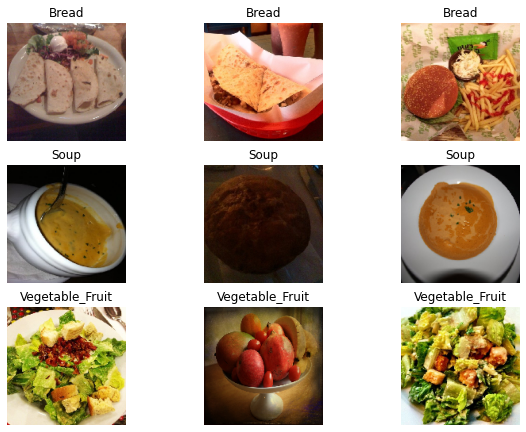

In [ ]:

# plotting 4 x 3 image matrix
fig = plt.figure(figsize = (10,10))

# Plotting three images from each of the four categories by looping through their path 
for i in range(9):
    if i < 3:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'                    # Here datadir is a path to the training data and categories[0] indicate the first label bread and here we are looping over to take the three random images that we have stored in select_galo variable 
        label = 'Bread'                                                 
    if i>=3 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i-3]}'                   # Here datadir is a path to the training data and categories[1] indicate the second label soup and here we are looping over to take the three random images that we have stored in select_menin variable 
        label = 'Soup' 
    if i>=6 and i<9:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_veg_fruit[i-6]}'              # Here datadir is a path to the training data and categories[2] indicate the third label vegetables-fruit and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'Vegetable_Fruit'
    ax = fig.add_subplot(4, 3, i+1)
    
    # Plotting each image using load_img function
    fn = image.load_img(fp, target_size = (150,150))
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

### **Data Preprocessing** 

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []
np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in training_data:                                           # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in testing_data:                                            # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_train
    y_test.append(label)                                                       # Appending labels into y_train

In [ ]:
# Converting the list into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"],dtype=object) 
y_test = pd.DataFrame(y_test, columns=["Label"],dtype=object)

### **Exploratory Data Analysis**

In [ ]:
# Storing the value counts of target variable
count=y_train.Label.value_counts()
print(count)
print('*'*10)
count=y_train.Label.value_counts(normalize=True)
print(count)

Soup               1500
Bread               994
Vegetable-Fruit     709
Name: Label, dtype: int64
**********
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: Label, dtype: float64


In [ ]:
# Converting the pixel values into Numpy array
X_train= np.array(X_train) 
X_test= np.array(X_test) 

In [ ]:
X_train.shape

(3203, 150, 150, 3)

**NOTE**

Images are digitally respresented in the form of numpy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using numpy arrays directly. So, even if the data is provided in the form of numpy arrays rather than images, we can use this to work on our model. 



Since the given data is stored in X_train, X_test,y_train, and y_test variables, there is no need to split the data further. 

**Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training a neural networks model: 

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1.**

In [ ]:
## Normalizing the image data 
X_train= X_train/255.0

### **Encoding Target Variable**

LabelBinarizer is another technique used to encode the target variables which reduces the sparsity as compared to one hot encoder. You can also look into the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For Example:
If we have 4 classes as "Good","Better","Okay","Bad". 
After applying LabelBinarizer on these 4 classes, the output result will be in the form of array.
* [1, 0, 0, 0] --------- Good
* [0, 1, 0, 0] --------- Better
* [0, 0, 1, 0] --------- Okay
* [0, 0, 0, 1] --------- Bad

Each class will be represented in the form of array




In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer() 
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)

### **Model Building** 

- **CNN** (Convolutional Neural Network)

#### **Convolutional Neural Network (CNN)**

**Model 1:**

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

* **Filters**: 256- Number of filters in the first hidden layer.This is also called as **Kernel**
* **Kernel_Size**: The kernel size here refers to the widthxheight of the filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7)
* **Padding**: The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
* **MaxPool2D**: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
* **Flatten**: Flattening is converting the data into a 1-dimensional array for giving them as input to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(3, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0

1. If the problem is having three classes to predict, then the neurons in the output layer will be 3. 

**model.add(Dense(3,activation = "softmax")**

2. If the problem is having 10 classes to predict, then the neurons in the output layer will be 10. 

**model.add(Dense(10,activation = "softmax")**

As we can see from the above summary, this CNN model will train and learn **1,185,107 parameters (weights and biases).**

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

**Early stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored.
- **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history=model.fit(X_train, 
          y_train_e,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/30
90/91 [============================>.] - ETA: 0s - loss: 0.9962 - accuracy: 0.5087
Epoch 1: val_accuracy improved from -inf to 0.54206, saving model to best_model.h5
91/91 [==============================] - 7s 65ms/step - loss: 0.9966 - accuracy: 0.5083 - val_loss: 0.8880 - val_accuracy: 0.5421
Epoch 2/30
90/91 [============================>.] - ETA: 0s - loss: 0.8425 - accuracy: 0.5854
Epoch 2: val_accuracy improved from 0.54206 to 0.57632, saving model to best_model.h5
91/91 [==============================] - 6s 61ms/step - loss: 0.8423 - accuracy: 0.5857 - val_loss: 0.8431 - val_accuracy: 0.5763
Epoch 3/30
90/91 [============================>.] - ETA: 0s - loss: 0.7804 - accuracy: 0.6163
Epoch 3: val_accuracy did not improve from 0.57632
91/91 [==============================] - 5s 60ms/step - loss: 0.7803 - accuracy: 0.6162 - val_loss: 0.9346 - val_accuracy: 0.5327
Epoch 4/30
90/91 [============================>.] - ETA: 0s - loss: 0.6965 - accuracy: 0.6743
Epoch 4: val_a

**Plotting Accuracy vs Epoch Curve**

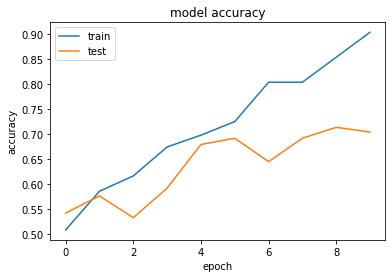

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the above plot, it seems that the model is overfitting, lets try to use Dropout in the next model.

In [ ]:
model.evaluate(X_test,(y_test_e))

35/35 [==============================] - 1s 32ms/step - loss: 0.7139 - accuracy: 0.7386


[0.7139349579811096, 0.7385740280151367]

In [ ]:
# Test Prediction 
y_test_pred_ln = model.predict(X_test)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)
normal_y_test = np.argmax(y_test_e, axis=1)

Since we have converted the target variable into a NumPy array using labelbinarizer, now we are converting the target variable into its original form by using the numpy. argmax() function which returns indices of the max element of the array in a particular axis and this original form of target will be used in calculating the accuracy, and plotting the confusion matrix.

In [ ]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln)

0.7385740402193784

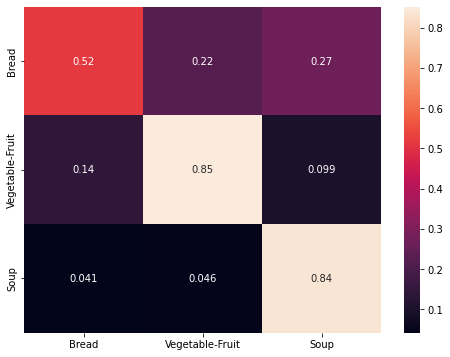

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

* The model is giving about 73% accuracy on the test data

### Model 2:

Lets try to build another CNN model with more layers added to the model.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# initialized a sequential model
model_3 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_3.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,3)))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))


# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model_3.add(Dense(64, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model_3.add(Dense(32, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))

# adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem with 3 classes.
model_3.add(Dense(3, activation = "softmax"))

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

As we can see from the above summary, this CNN model will train and learn **1,099,171 parameters (weights and biases).**

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

In [ ]:
optimizer = Adam(lr=0.001)
model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model_3.fit(X_train, 
          y_train_e,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc],use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.0909 - accuracy: 0.4500
Epoch 1: val_accuracy improved from -inf to 0.47040, saving model to best_model.h5
91/91 [==============================] - 76s 800ms/step - loss: 1.0909 - accuracy: 0.4500 - val_loss: 1.0578 - val_accuracy: 0.4704
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.0624 - accuracy: 0.4688
Epoch 2: val_accuracy did not improve from 0.47040
91/91 [==============================] - 27s 292ms/step - loss: 1.0624 - accuracy: 0.4688 - val_loss: 1.0489 - val_accuracy: 0.4704
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.0605 - accuracy: 0.4684
Epoch 3: val_accuracy did not improve from 0.47040
91/91 [==============================] - 27s 292ms/step - loss: 1.0605 - accuracy: 0.4684 - val_loss: 1.0474 - val_accuracy: 0.4704
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 1.0567 - accuracy: 0.4667
Epoch 4: val_accuracy did not improve from 

**Plotting Accuracy vs Epoch Curve**

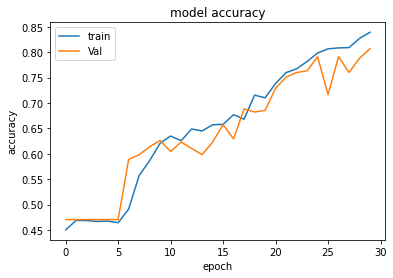

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

Train and Validation accuracy seems fine and let's calculate the accuracy on the test data

In [ ]:
model_3.evaluate(X_test,y_test_e)

35/35 [==============================] - 5s 136ms/step - loss: 0.5958 - accuracy: 0.7852


[0.5957765579223633, 0.7851919531822205]

By comparing the train and test accuracy, it seems the model is not overfitting, so adding more layers to the model worked, and we can say that this CNN model is good. We can also try building different models by increasing the hidden layers and see if we get good accuracy.

In [ ]:
y_test_pred_ln3 = model_3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(normal_y_test, y_test_pred_classes_ln3)

0.7851919561243145

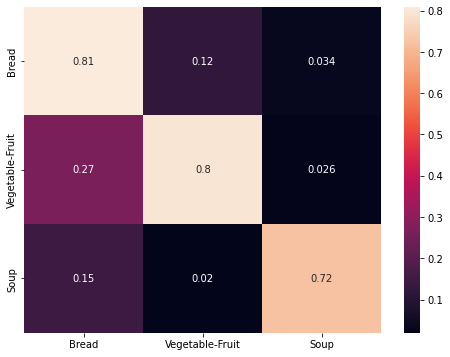

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

### Model: 3
#### Transfer Learning (VGG16) with Data Agumentation

#### **Data Augmentation**

In most real-life case studies, it is generally difficult to collect lots of images and then train CNNs. In that case, one idea we can take advantage of is Data Augmentation. CNNs have the property of **translational invariance**, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images using the following techniques:  **Data Augmentation**

In most real-life case studies, it is generally difficult to collect lots of images and then train CNNs. In that case, one idea we can take advantage of is Data Augmentation. CNNs have the property of **translational invariance**, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images using the following techniques: 

**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

In [ ]:
# sTORING TRAIN AND TEST DATA PATH
train_dir = "/content/Food_Data/Training"
test_dir  = "/content/Food_Data/Testing"

# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Flowing training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

# Flowing validation images in batches of 20 using test_datagen generator
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 3203 images belonging to 3 classes.
Found 1094 images belonging to 3 classes.


- Now, let's build a model, but this time, using the idea of **Transfer Learning** with Data Agumentation. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and finished runner-up in the ImageNet competition in 2014. Below is a schematic of the VGG16 model.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. We will remove the already-present fully-connected layers and add our own fully-connected layers for this binary classification task.

![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

In [ ]:
# Loading VGG16 model 
model = VGG16(weights='imagenet')
# Summary of the whole model
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

- To remove the fully-connected layers of the imported pre-trained model, while calling it from Keras we can also specify an additonal keyword argument that is **include_top**. 

- **If we specify include_top = False, then the model will be imported without the fully-connected layers.** Here we won't have to do the above steps of getting the last convolutional layer and creating a separate model.

- If we are specifying include_top = False, we will also have to specify our input image shape.

- Keras has this keyword argument as generally while importing a pre-trained CNN model, we don't require the fully-connected layers and we train our own fully-connected layers for our task.- To remove the fully-connected layers of the imported pre-trained model, while calling it from Keras we can also specify an additonal keyword argument that is **include_top**. 

- **If we specify include_top = False, then the model will be imported without the fully-connected layers.** Here we won't have to do the above steps of getting the last convolutional layer and creating a separate model.

- If we are specifying include_top = False, we will also have to specify our input image shape.

- Keras has this keyword argument as generally while importing a pre-trained CNN model, we don't require the fully-connected layers and we train our own fully-connected layers for our task.

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense input layer
new_model.add(Dense(32, activation='relu'))
# Adding dropout 
new_model.add(Dropout(0.2))
# Adding second input layer
new_model.add(Dense(32, activation='relu'))
# Adding output layer
new_model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 14,978,019
Trainable params: 263,331
Non-t

In [ ]:
## Pulling a single large batch of random validation data for testing after each epoch
testX, testY = test_generator.next()

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Fitting the VGG model
new_model_history = new_model.fit(train_generator, 
                                  validation_data = (testX, testY),
                                  epochs=30,callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
161/161 [==============================] - ETA: 0s - loss: 0.5190 - accuracy: 0.7836
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to best_model.h5
161/161 [==============================] - 48s 294ms/step - loss: 0.5190 - accuracy: 0.7836 - val_loss: 0.4157 - val_accuracy: 0.8000
Epoch 2/30
161/161 [==============================] - ETA: 0s - loss: 0.3060 - accuracy: 0.8879
Epoch 2: val_accuracy improved from 0.80000 to 0.90000, saving model to best_model.h5
161/161 [==============================] - 51s 316ms/step - loss: 0.3060 - accuracy: 0.8879 - val_loss: 0.2630 - val_accuracy: 0.9000
Epoch 3/30
161/161 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9076
Epoch 3: val_accuracy did not improve from 0.90000
161/161 [==============================] - 50s 309ms/step - loss: 0.2486 - accuracy: 0.9076 - val_loss: 0.1813 - val_accuracy: 0.9000
Epoch 4/30
161/161 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0

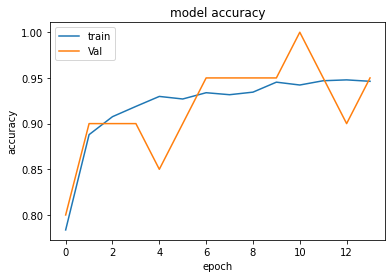

In [ ]:
plt.plot(new_model_history.history['accuracy'])
plt.plot(new_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Evaluating on the Test set
new_model.evaluate(test_generator)

55/55 [==============================] - 13s 235ms/step - loss: 0.1913 - accuracy: 0.9369


[0.19127945601940155, 0.9369286894798279]

In [ ]:
y_test_pred_ln4 = new_model.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(normal_y_test, y_test_pred_classes_ln4)

0.8756855575868373

We were able to get good accuracy as compared to previous model.

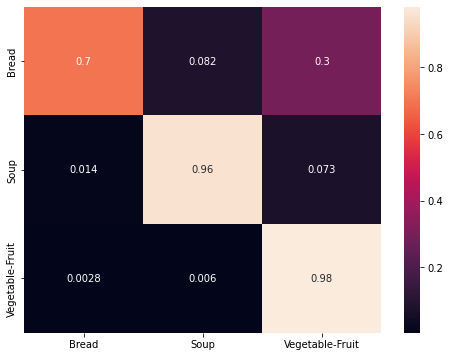

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F1 score:** The F1 score is the harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.

**CNN Model 1**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       362
           1       0.76      0.85      0.80       500
           2       0.69      0.84      0.76       232

    accuracy                           0.74      1094
   macro avg       0.73      0.74      0.72      1094
weighted avg       0.74      0.74      0.73      1094



**CNN Model 2**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(normal_y_test, y_test_pred_classes_ln3))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       362
           1       0.85      0.80      0.82       500
           2       0.92      0.72      0.81       232

    accuracy                           0.79      1094
   macro avg       0.81      0.78      0.79      1094
weighted avg       0.80      0.79      0.79      1094



In [ ]:
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln4))

              precision    recall  f1-score   support

           0       0.98      0.70      0.81       362
           1       0.92      0.96      0.94       500
           2       0.73      0.98      0.84       232

    accuracy                           0.88      1094
   macro avg       0.87      0.88      0.86      1094
weighted avg       0.90      0.88      0.87      1094



### **Prediction**

Let us predict using the best model which is model_3 by plotting one random image from X_test data with variable and see if our best model is predicting the image correctly or not.

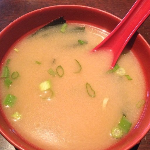

In [ ]:
# Plotting the test image 
cv2_imshow(X_test[2])

In [ ]:
# Predicting the test image with the best model and storing the prediction value in res variable
res=new_model.predict(X_test[2].reshape(1,150,150,3))

In [ ]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

Soup


Try plotting different images from test data and see if the model is predicting the image correctly.Try plotting different images from test data and see if the model is predicting the image correctly.

### **Conclusion**

1. As we have seen, the CNN model - 3 was able to predict the test image correctly with a test accuracy of 87%.

2. **There might still be scope for improvement in the accuracy of the CNN model** chosen here. Try adding a more dense layer to the VGG16 model and see if you can get more accuracy than the best model. 

3. Once the desired performance is achieved from the model, the company can use it to classify different images being uploaded to the website.


## Happy Learning!